In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

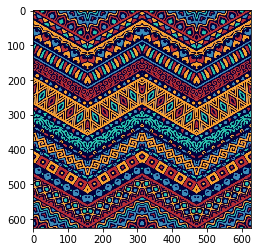

In [49]:
originalImage = cv2.imread("./assets/img/00.jpg")
#Original
plt.imshow(cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB))

white = originalImage.copy()
h , w , _ = image.shape



In [15]:
#Convert both images into gray scale
originalImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
originalImage_H, originalImage_W  = originalImage.shape

In [16]:
###Create AKAZE 
akaze = cv2.AKAZE_create()
originalImage_kp, originalImage_des = akaze.detectAndCompute (originalImage,None)

In [26]:
###Find Matches using KNN matcher which find the nearest almost points to each other that match in the two images.
matcher = cv2.BFMatcher()
knnMatches = matcher.knnMatch(originalImage_des,originalImage_des, k=5)

In [35]:
temp = []
comp = []
for i in range(0,len(originalImage_des)):
    array_sum = np.sum(originalImage_des[i])
    for j in range(0,len(originalImage_des)):
        temp.append(np.sum(abs(originalImage_des[i] - originalImage_des[j]))/array_sum)
    comp.append(temp)
    temp = []

In [44]:
for i in range(0,len(comp)):
    for j in range(0,len(comp[i])): 
        if comp[i][j] >= 0.45 :
            comp[i][j] = 0

In [50]:
non_zeros_counted = []
for i in range(0,len(comp)):
    non_zeros_counted.append(np.count_nonzero(comp[i]))

In [57]:
white[0:h,0:w] = 255
for i in range(0,len(originalImage_kp)):
    if non_zeros_counted[i] > 3:
        pt = (round(originalImage_kp[i].pt[0]),round(originalImage_kp[i].pt[1]))
        cv2.line(white,pt,pt,(255,0,0),2)

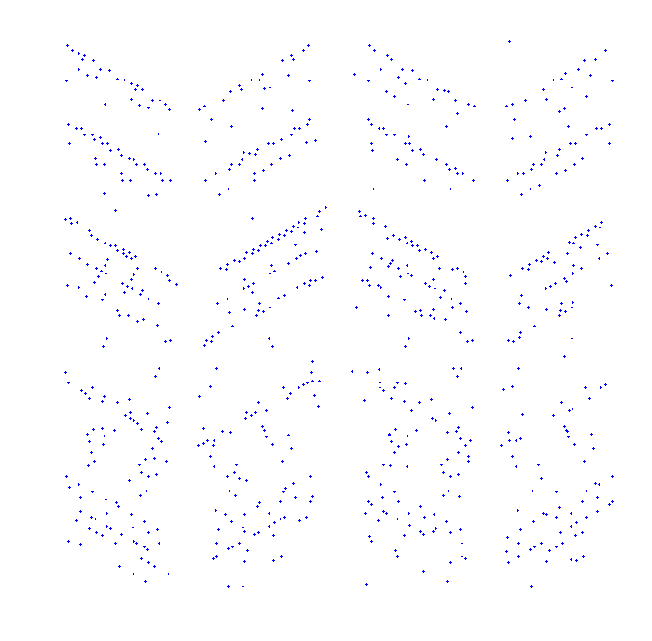

In [58]:
plt.figure()
plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.axis("off")
plt.imshow(cv2.cvtColor(white, cv2.COLOR_BGR2RGB))